# Custom CNN architecture

In [4]:
# Run the previous notebook to load all its classes and functions
%run busi_augmentation_2.ipynb

Found 210 images and 211 masks in malignant folder


Processing malignant masks: 100%|███████████████████████████████████████████████████| 211/211 [00:00<00:00, 641.76it/s]


Found 133 images and 133 masks in normal folder


Processing normal masks: 100%|██████████████████████████████████████████████████████| 133/133 [00:00<00:00, 282.68it/s]


Found 437 images and 454 masks in benign folder


Processing benign masks: 100%|██████████████████████████████████████████████████████| 454/454 [00:00<00:00, 589.63it/s]


Combined 2 masks for malignant (53).png
Combined 2 masks for benign (100).png
Combined 2 masks for benign (163).png
Combined 2 masks for benign (173).png
Combined 2 masks for benign (181).png
Combined 3 masks for benign (195).png
Combined 2 masks for benign (25).png
Combined 2 masks for benign (315).png
Combined 2 masks for benign (346).png
Combined 2 masks for benign (4).png
Combined 2 masks for benign (424).png
Combined 2 masks for benign (54).png
Combined 2 masks for benign (58).png
Combined 2 masks for benign (83).png
Combined 2 masks for benign (92).png
Combined 2 masks for benign (93).png
Combined 2 masks for benign (98).png
Dataset shape: (780, 224, 224, 1)
Masks shape: (780, 224, 224, 1)
Labels shape: (780,)
Class distribution: Normal: 133, Benign: 437, Malignant: 210
Training set sizes: X_train: (546, 224, 224, 1), y_train: (546,), masks: (780, 224, 224, 1)
Augmented training set sizes: X_aug: (1758, 224, 224, 1), y_aug: (1758,), masks: (1758, 224, 224, 1)
Validation set sizes

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU, BatchNormalization, Conv2D, MaxPooling2D, Flatten,  Dropout, Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import seaborn as sns
import time

In [6]:
print(X_aug.shape)
print(y_aug.shape)
print(masks_aug.shape)

(1758, 224, 224, 1)
(1758,)
(1758, 224, 224, 1)


# Apply MINMAX normalization (suitable for CNNs custom)

In [7]:
# Train
X_train_aug = X_aug.astype("float32") / 255.0
masks_train_aug = masks_aug.astype("float32") / 255.0
y_train_aug = y_aug

# Test
X_test = X_test.astype("float32") / 255.0
masks_test = masks_test.astype("float32") / 255.0
y_test = y_test

# Validation
X_val = X_val.astype("float32") / 255.0
masks_val = masks_val.astype("float32") / 255.0
y_val = y_val



# 1. Model from article

In [8]:
model = Sequential([
    # Input layer (grayscale images 224x224x1)
    Input(shape=(224, 224, 1)),

    # Convolutional layer: 20 filters, kernel size 5x5
    Conv2D(20, (5, 5), padding="same"),
    
    # Batch Normalization (20 channels)
    BatchNormalization(),
    
    # ReLU activation
    Activation("relu"),
    
    # MaxPooling
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten before fully connected
    Flatten(),
    
    # Fully connected layer (let’s use 128 units)
    Dense(128, activation="relu"),
    
    # Dropout 50%
    Dropout(0.5),
    
    # Output layer with 3 classes
    Dense(3, activation="softmax")
])

In [9]:
# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop]
)

# Save
label = (
    f"custom_CNN_from_Convolutionalneuralnetwork-basedmodelsfordiagnosisofbreast"
)
histories.append((label, history))

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 38s 662ms/step - accuracy: 0.3490 - loss: 45.4109 - val_accuracy: 0.2735 - val_loss: 1.0989
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 645ms/step - accuracy: 0.3522 - loss: 1.1493 - val_accuracy: 0.5641 - val_loss: 1.0962
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 651ms/step - accuracy: 0.3508 - loss: 1.0980 - val_accuracy: 0.5556 - val_loss: 1.0943
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 648ms/step - accuracy: 0.3435 - loss: 1.0986 - val_accuracy: 0.5556 - val_loss: 1.0932
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 647ms/step - accuracy: 0.3555 - loss: 1.0973 - val_accuracy: 0.5556 - val_loss: 1.0898
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 35s 644ms/step - accuracy: 0.3487 - loss: 1.0981 - val_accuracy: 0.5556 - val_loss: 1.0892
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 646ms/step - accuracy: 0.3493 - loss: 1.0978 - val_accuracy: 0.5556 - val_loss: 1.0876
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 35s 643ms/step - accuracy: 0.3609 - loss: 1.0974 - val_acc

We can see that maximum val_accuracy is ~55%

# 2. Custom CNNs (initial trials)

In [5]:
# Hyperparameter options

activations = [
    ("relu", "relu"),
    ("leakyrelu", LeakyReLU(negative_slope=0.01))
]
conv_base_filters =[32, 64, 128]


histories = []


for conv_base_filter in conv_base_filters:
    for activation_name, activation_fn in activations:
            print(
                f"Training model with: "
                f"activation={activation_name}, "
                f"conv_base_filter={conv_base_filter}"
            )
        
            #Apply early stopping to save time & avoid overfitting
            # Early stopping
            early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)


            # Model definition
            model = Sequential([
                Input(shape=(224, 224, 1)),
                Conv2D(conv_base_filter, kernel_size=(3,3), activation=activation_fn),
                MaxPooling2D(pool_size=(2, 2)),

                Conv2D(conv_base_filter*2, kernel_size=(3,3), activation=activation_fn),
                MaxPooling2D(pool_size=(2, 2)),

                Conv2D(conv_base_filter*4, kernel_size=(3,3), activation=activation_fn),
                MaxPooling2D(pool_size=(2, 2)),

                Flatten(),
                Dense(128, activation=activation_fn),
                Dropout(0.5),
                Dense(3, activation='softmax')
            ])

            # Compile
            model.compile(
                optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

            # Train
            history = model.fit(
                X_train_aug, y_train_aug,
                validation_data=(X_val, y_val),
                epochs=30,
                batch_size=32,
                callbacks=[early_stop]
            )

            # Save
            label = (
                f"conv_base_filter={conv_base_filter}, "
                f"activation={activation_name} "
            )
            histories.append((label, history))


Training model with: activation=relu, conv_base_filter=32
Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 528ms/step - accuracy: 0.3390 - loss: 1.1208 - val_accuracy: 0.2735 - val_loss: 1.0950
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 523ms/step - accuracy: 0.4744 - loss: 1.0145 - val_accuracy: 0.6239 - val_loss: 0.8997
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 522ms/step - accuracy: 0.6098 - loss: 0.8642 - val_accuracy: 0.6068 - val_loss: 0.9222
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 528ms/step - accuracy: 0.7167 - loss: 0.6804 - val_accuracy: 0.6410 - val_loss: 0.8793
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 523ms/step - accuracy: 0.8060 - loss: 0.4939 - val_accuracy: 0.6667 - val_loss: 0.7646
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 29s 531ms/step - accuracy: 0.8805 - loss: 0.3178 - val_accuracy: 0.6496 - val_loss: 0.8946
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 30s 537ms/step - accuracy: 0.9289 - loss: 0.2115 - val_accuracy: 0.6581 - val_loss: 0.9268
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 2

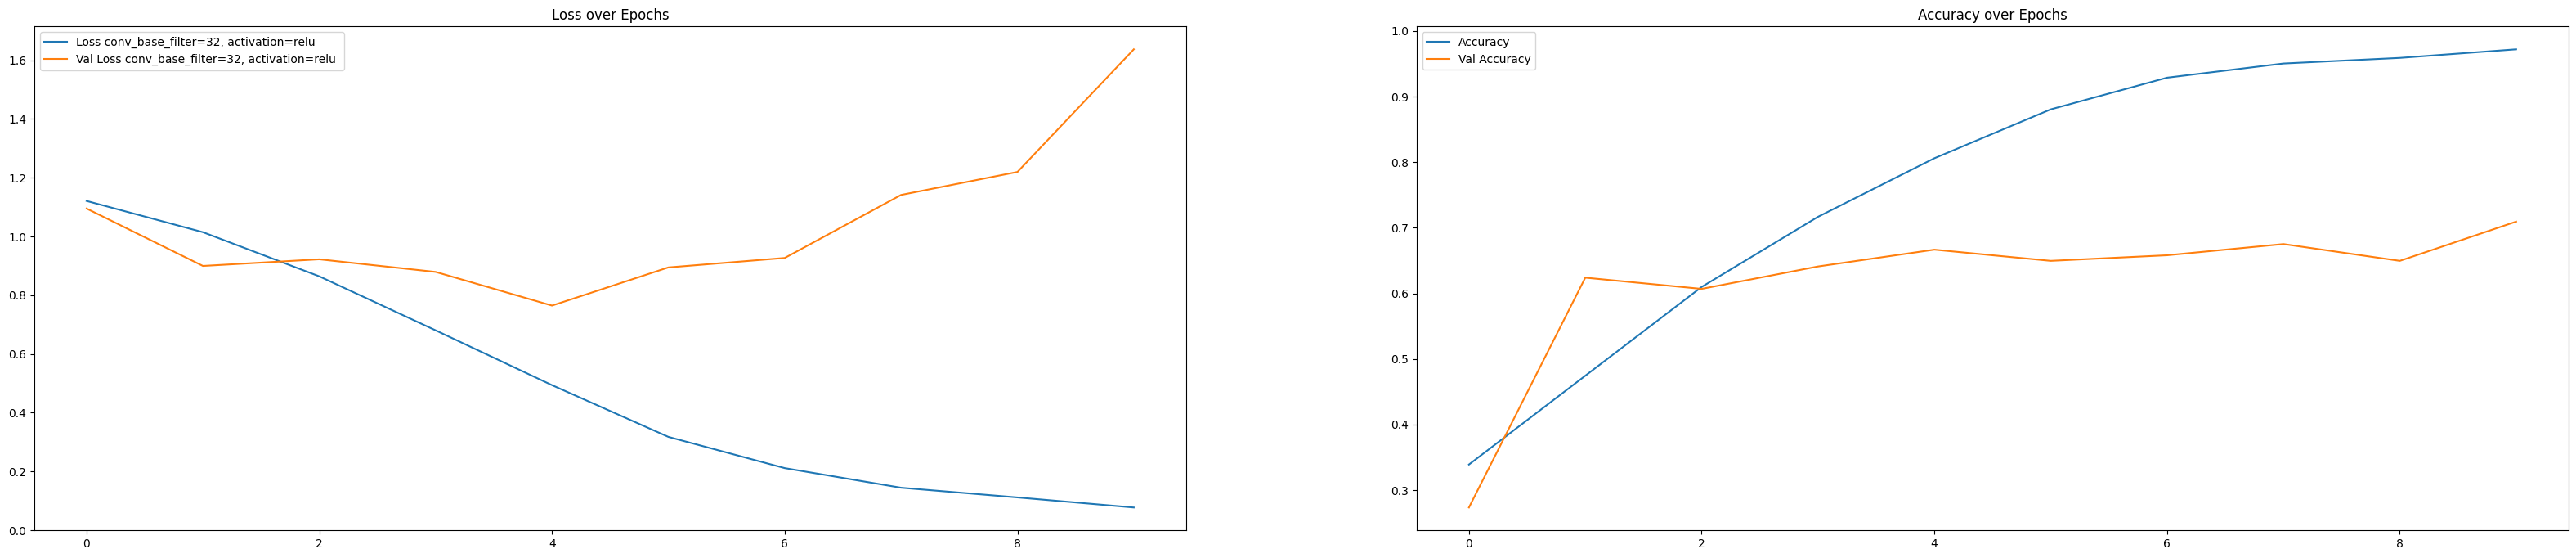

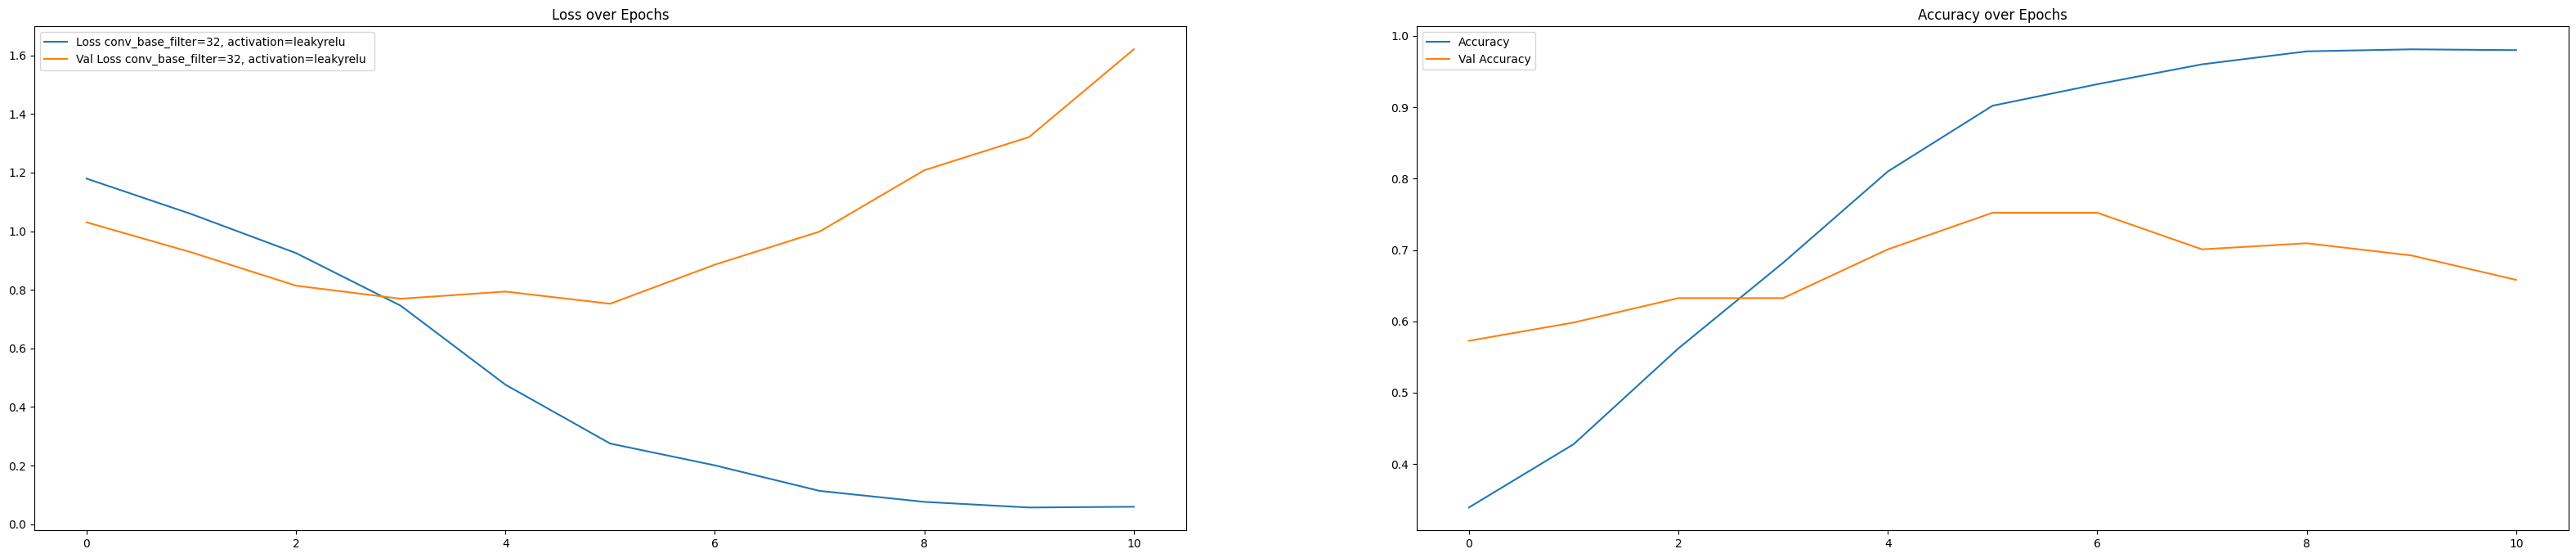

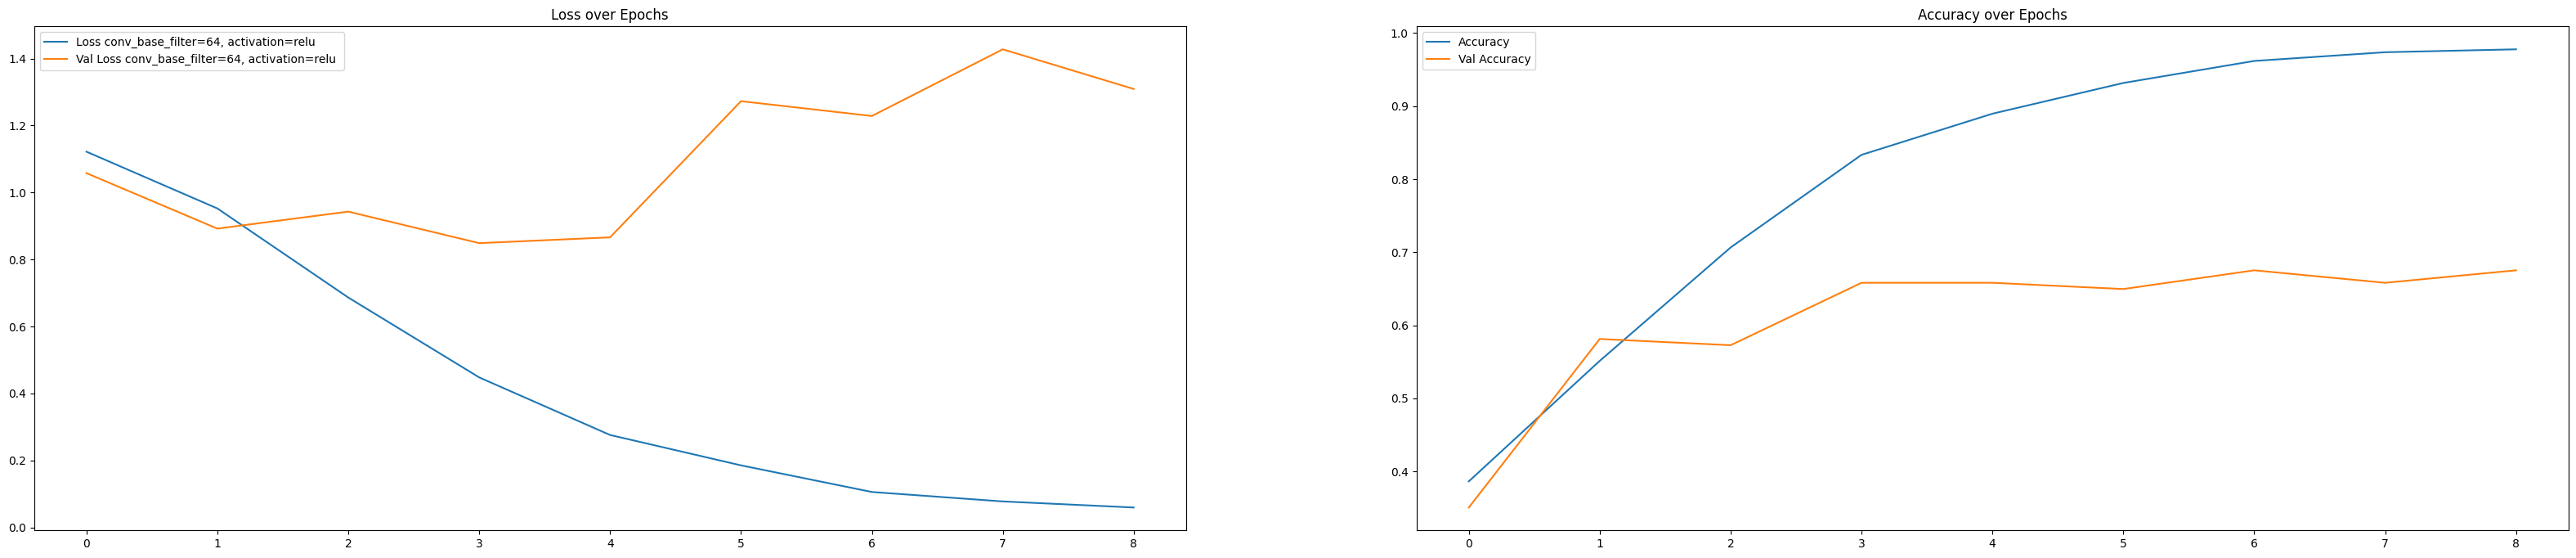

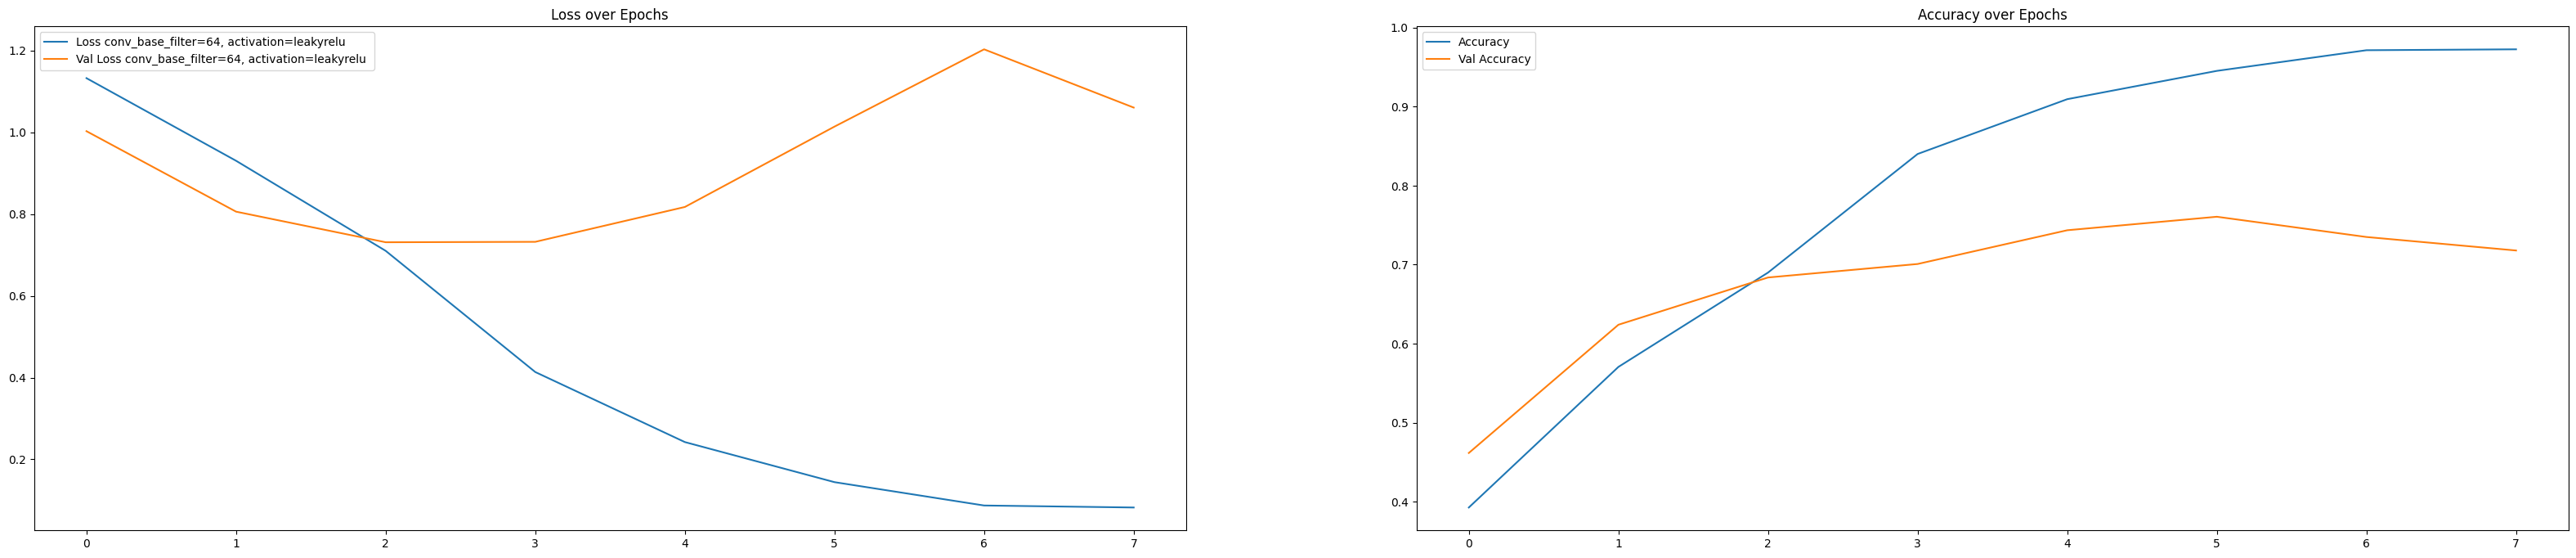

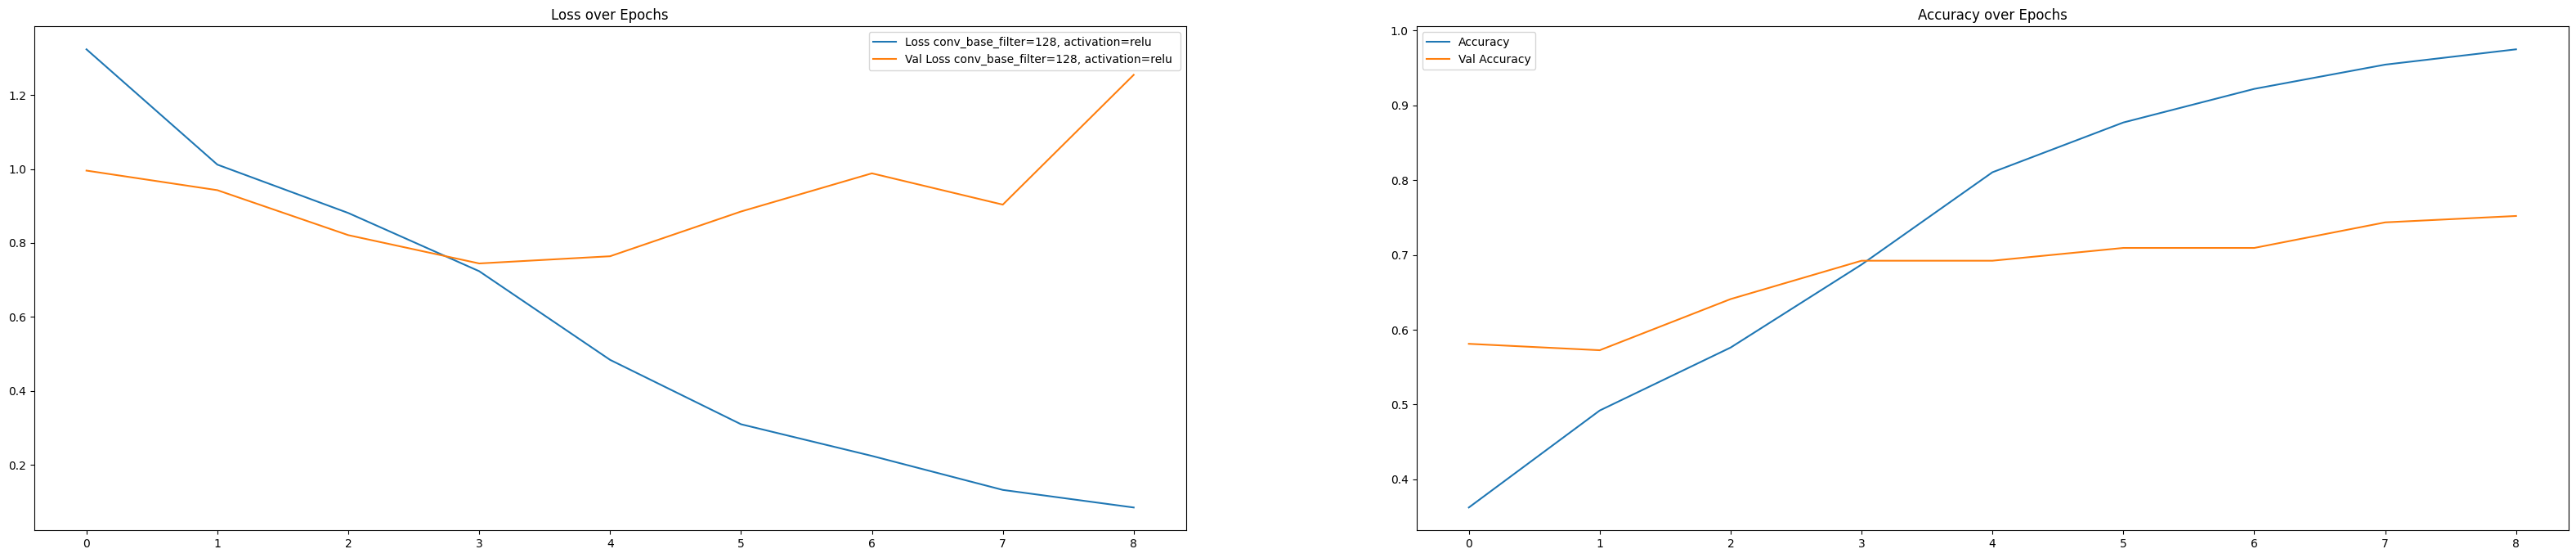

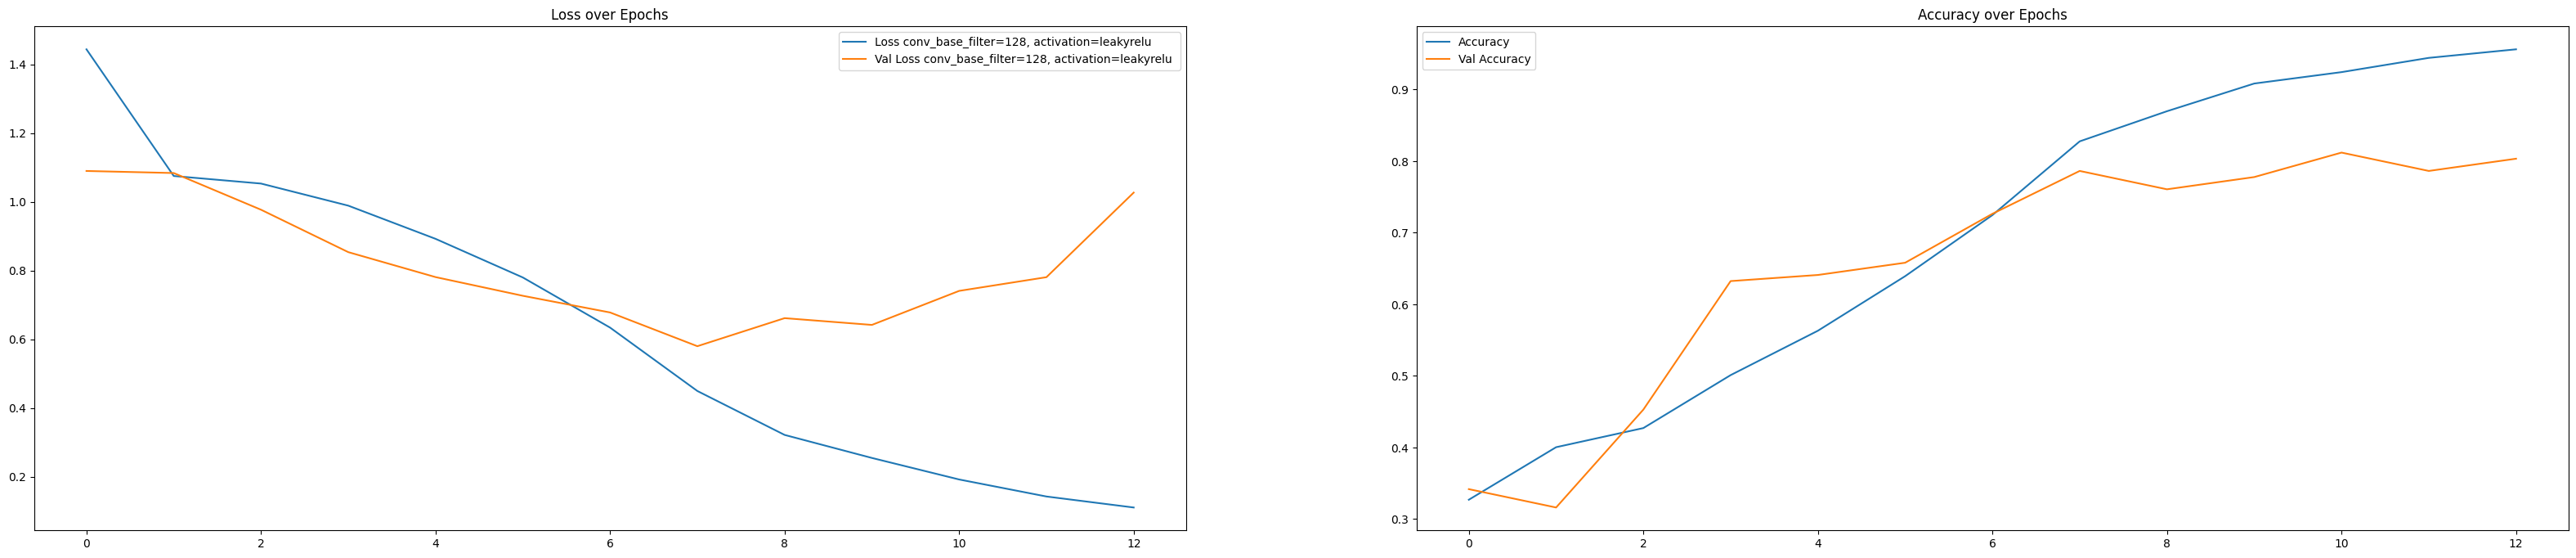

In [6]:
for label, history in histories:
    plt.figure(figsize=(40, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss '+label)
    plt.plot(history.history['val_loss'], label='Val Loss '+label)
    plt.legend()
    plt.title("Loss over Epochs")
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy over Epochs")
    plt.show()



Although deeper models with larger convolutional filters require more training time, the performance gain is significant. The architecture starting with 128 filters in the first convolutional layer (128–256–512), combined with LeakyReLU activations and dropout regularization, achieved the highest validation accuracy (81.2%) and the lowest validation loss (0.5797) on the BUSI dataset. Given the critical nature of breast cancer detection and the absence of real-time constraints, maximizing model performance outweighs concerns about training speed or computational cost.


Let us try fine-tuning the model, with changing some parameters and adding small changes that could improve performance.

# 1. Small changes (different dropouts and initial kernels)

To account for the stochastic nature of CNN training, each hyperparameter configuration was trained 3–5 times with different random seeds. The performance metrics reported correspond to the average validation accuracy and loss across these runs. Among the configurations tested, the model with initial filters 128→256→512, LeakyReLU activation, and dropout 0.5 consistently achieved the highest average validation accuracy and lowest average validation loss, and is therefore selected as the best-performing architecture for further experiments.

### Let us keep a history also for this model adjustments to see the plots

In [8]:
histories_leaky_128 = []

And now train the models

In [ ]:
initial_kernels = [(3,3),(5,5)]
dropouts = [0.5, 0.6, 0.7]


for initial_kernel in initial_kernels:
    for dropout in dropouts:
        print(
                f"Training model with: "
                f"initial_kernel={initial_kernel}, "
                f"dropout={dropout}"
            )

        # Early stopping
        early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)


        # Model definition
        model = Sequential([
            Input(shape=(224, 224, 1)),
            Conv2D(128, kernel_size=initial_kernel, activation=(LeakyReLU(negative_slope=0.01))),
            MaxPooling2D(pool_size=(2, 2)),
        
            Conv2D(128*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
            MaxPooling2D(pool_size=(2, 2)),
        
            Conv2D(128*4, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
            MaxPooling2D(pool_size=(2, 2)),
        
            Flatten(),
            Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
            Dropout(dropout),
            Dense(3, activation='softmax')
        ])
        
        # Compile
        model.compile(
            optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        
        # Train
        history = model.fit(
            X_train_aug, y_train_aug,
            validation_data=(X_val, y_val),
            epochs=30,
            batch_size=32,
            callbacks=[early_stop]
        )
        
        # Save
        label = (
            f"initial_kernel={initial_kernel}, "
            f"dropout={dropout}"
        )
        histories_leaky_128.append((label, history))

Training model with: initial_kernel=(3, 3), dropout=0.5
Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 303s 5s/step - accuracy: 0.3572 - loss: 1.4752 - val_accuracy: 0.1880 - val_loss: 1.1224
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 322s 6s/step - accuracy: 0.4329 - loss: 1.0525 - val_accuracy: 0.6239 - val_loss: 0.9139
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 333s 6s/step - accuracy: 0.5284 - loss: 0.9470 - val_accuracy: 0.5385 - val_loss: 0.9405
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 330s 6s/step - accuracy: 0.6092 - loss: 0.8387 - val_accuracy: 0.6752 - val_loss: 0.7065
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 333s 6s/step - accuracy: 0.7071 - loss: 0.6647 - val_accuracy: 0.6923 - val_loss: 0.7008
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 332s 6s/step - accuracy: 0.7725 - loss: 0.5296 - val_accuracy: 0.6667 - val_loss: 0.8657
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 330s 6s/step - accuracy: 0.8265 - loss: 0.4263 - val_accuracy: 0.6923 - val_loss: 0.7695
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 330s 6s/step - ac

In [ ]:
for label, history in histories_leaky_128:
    plt.figure(figsize=(40, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss '+label)
    plt.plot(history.history['val_loss'], label='Val Loss '+label)
    plt.legend()
    plt.title("Loss over Epochs")
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title("Accuracy over Epochs")
    plt.show()



We can see that Training model with: initial_kernel=(5, 5), dropout=0.7 provides the best results. Now let us try to improve it with some advanced techniques.

In [35]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(128, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

### Label Smoothing

In [36]:
import numpy as np
import tensorflow as tf

num_classes = 3  # Normal, Benign, Malignant
label_smoothing = 0.1

def smooth_labels(y, num_classes, smoothing=0.1):
    """
    Converts sparse labels to smoothed one-hot vectors.
    """
    y_one_hot = tf.one_hot(y, depth=num_classes)
    smooth_positives = 1.0 - smoothing
    smooth_negatives = smoothing / num_classes
    y_smooth = y_one_hot * smooth_positives + smooth_negatives
    return y_smooth


In [37]:
y_train_smooth = smooth_labels(y_train_aug, num_classes, label_smoothing)
y_val_smooth = smooth_labels(y_val, num_classes, label_smoothing)


In [9]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model_final.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

        
# Train
history = model_final.fit(
        X_train_aug, y_train_smooth,
        validation_data=(X_val, y_val_smooth),
        epochs=30,
        batch_size=32,
        callbacks=[early_stop]
        )

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3641 - loss: 1.1715 - val_accuracy: 0.6068 - val_loss: 1.0505
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.4039 - loss: 1.0881 - val_accuracy: 0.5726 - val_loss: 1.0243
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.5091 - loss: 1.0043 - val_accuracy: 0.6325 - val_loss: 0.9147
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.6075 - loss: 0.8995 - val_accuracy: 0.6410 - val_loss: 0.8625
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7332 - loss: 0.7425 - val_accuracy: 0.6923 - val_loss: 0.7921
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8464 - loss: 0.6143 - val_accuracy: 0.7094 - val_loss: 0.7730
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.9061 - loss: 0.5217 - val_accuracy: 0.7350 - val_loss: 0.7665
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9340 - loss: 0.4636 - val_accuracy: 0.7436 - val_loss:

We can see that now we get 80% validation accuracy (around epoch 14).

### Learning Rate Scheduler

In [ ]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64*2, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

In [16]:
# Learning rate scheduler
reduce_lr_1 = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)

reduce_lr_2 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

reduce_lr_3 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=5,
    min_lr=1e-6,
    verbose=1
)


# Compile your model
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model_final.compile(optimizer='adam', loss=loss, metrics=['accuracy'])



## Default

In [ ]:
# Train with callbacks
history = model_final.fit(
    X_train_aug, y_train_smooth,
    validation_data=(X_val, y_val_smooth),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr_1]
)

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.3350 - loss: 1.2126 - val_accuracy: 0.3761 - val_loss: 1.0995 - learning_rate: 0.0010
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.4243 - loss: 1.0758 - val_accuracy: 0.5812 - val_loss: 0.9964 - learning_rate: 0.0010
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.4886 - loss: 1.0258 - val_accuracy: 0.5385 - val_loss: 0.9800 - learning_rate: 0.0010
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.5284 - loss: 0.9813 - val_accuracy: 0.6154 - val_loss: 0.8931 - learning_rate: 0.0010
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5722 - loss: 0.9361 - val_accuracy: 0.6667 - val_loss: 0.8288 - learning_rate: 0.0010
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6086 - loss: 0.8990 - val_accuracy: 0.5812 - val_loss: 0.8720 - learning_rate: 0.0010
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.7184 - loss: 0.7789 - val_accuracy

## More aggressive decay

In [ ]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64*2, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

In [11]:
# Train with callbacks
history = model_final.fit(
    X_train_aug, y_train_smooth,
    validation_data=(X_val, y_val_smooth),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr_2]
)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3601 - loss: 1.1581 - val_accuracy: 0.5043 - val_loss: 1.0302 - learning_rate: 0.0010
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5023 - loss: 1.0226 - val_accuracy: 0.6239 - val_loss: 0.9245 - learning_rate: 0.0010
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5779 - loss: 0.9304 - val_accuracy: 0.6410 - val_loss: 0.8633 - learning_rate: 0.0010
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.7190 - loss: 0.7739 - val_accuracy: 0.6752 - val_loss: 0.7874 - learning_rate: 0.0010
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8163 - loss: 0.6353 - val_accuracy: 0.7350 - val_loss: 0.7268 - learning_rate: 0.0010
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9016 - loss: 0.5226 - val_accuracy: 0.7265 - val_loss: 0.7259 - learning_rate: 0.0010
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9443 - loss: 0.4561 - val_accuracy: 

## More patient and less aggressive

In [ ]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64*2, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

In [17]:
# Train with callbacks
history = model_final.fit(
    X_train_aug, y_train_smooth,
    validation_data=(X_val, y_val_smooth),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr_3]
)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.3561 - loss: 1.2030 - val_accuracy: 0.5812 - val_loss: 1.0344 - learning_rate: 0.0010
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.4448 - loss: 1.0660 - val_accuracy: 0.5214 - val_loss: 1.0102 - learning_rate: 0.0010
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.5205 - loss: 1.0060 - val_accuracy: 0.5897 - val_loss: 0.9342 - learning_rate: 0.0010
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.6297 - loss: 0.8932 - val_accuracy: 0.7094 - val_loss: 0.8048 - learning_rate: 0.0010
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.7509 - loss: 0.7395 - val_accuracy: 0.7265 - val_loss: 0.7655 - learning_rate: 0.0010
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8515 - loss: 0.5978 - val_accuracy: 0.7009 - val_loss: 0.7585 - learning_rate: 0.0010
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9027 - loss: 0.5183 - val_accuracy: 

### Cosine Annealing / Learning Rate Scheduler

In [ ]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64*2, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

In [22]:
# Base setup
lr_schedule_1 = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=30 * len(X_train_aug),  # for 15 epochs
    alpha=1e-5
)

# Slower decay (higher alpha)
lr_schedule_2 = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=30 * len(X_train_aug),
    alpha=0.1  # final LR = 10% of initial
)

# Start slower but decay more
lr_schedule_3 = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=5e-4,
    decay_steps=30 * len(X_train_aug),
    alpha=0.01
)

# Decay slower, over more steps
lr_schedule_4 = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=40 * len(X_train_aug),  # longer decay
    alpha=1e-5
)




In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule_1)

# Compile your model
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model_final.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
 
# Train
history = model_final.fit(
    X_train_aug, y_train_smooth,
    validation_data=(X_val, y_val_smooth),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.3549 - loss: 1.1699 - val_accuracy: 0.5043 - val_loss: 1.0628
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.4716 - loss: 1.0515 - val_accuracy: 0.6496 - val_loss: 0.9408
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.6172 - loss: 0.9038 - val_accuracy: 0.6496 - val_loss: 0.8963
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.7241 - loss: 0.7674 - val_accuracy: 0.6667 - val_loss: 0.8201
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8356 - loss: 0.6191 - val_accuracy: 0.6923 - val_loss: 0.8383
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9039 - loss: 0.5119 - val_accuracy: 0.7094 - val_loss: 0.7998
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9499 - loss: 0.4494 - val_accuracy: 0.7350 - val_loss: 0.8360
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9670 - loss: 0.4164 - val_accuracy: 0.7179 - val_loss:

In [ ]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64*2, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule_2)

# Compile your model
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model_final.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
 
# Train
history = model_final.fit(
    X_train_aug, y_train_smooth,
    validation_data=(X_val, y_val_smooth),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.3589 - loss: 1.1834 - val_accuracy: 0.2735 - val_loss: 1.0705
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.4829 - loss: 1.0230 - val_accuracy: 0.6752 - val_loss: 0.8803
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6200 - loss: 0.9003 - val_accuracy: 0.6410 - val_loss: 0.8517
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.7139 - loss: 0.7829 - val_accuracy: 0.6496 - val_loss: 0.8269
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7850 - loss: 0.6825 - val_accuracy: 0.6667 - val_loss: 0.8458
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8515 - loss: 0.5893 - val_accuracy: 0.6838 - val_loss: 0.8275
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9039 - loss: 0.5190 - val_accuracy: 0.7094 - val_loss: 0.7659
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.9357 - loss: 0.4691 - val_accuracy: 0.7179 - val_loss:

In [ ]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64*2, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

In [33]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule_3)

# Compile your model
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model_final.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
 
# Train
history = model_final.fit(
    X_train_aug, y_train_smooth,
    validation_data=(X_val, y_val_smooth),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.3447 - loss: 1.1633 - val_accuracy: 0.5556 - val_loss: 1.0616
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.3862 - loss: 1.0846 - val_accuracy: 0.5897 - val_loss: 0.9777
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.4886 - loss: 1.0332 - val_accuracy: 0.6154 - val_loss: 0.9459
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.5620 - loss: 0.9673 - val_accuracy: 0.6154 - val_loss: 0.8569
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.6388 - loss: 0.8704 - val_accuracy: 0.6239 - val_loss: 0.8295
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.7537 - loss: 0.7294 - val_accuracy: 0.7094 - val_loss: 0.8162
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8373 - loss: 0.6180 - val_accuracy: 0.6667 - val_loss: 0.8310
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8925 - loss: 0.5352 - val_accuracy: 0.7009 - val

In [ ]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64*2, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

In [38]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule_4)

# Compile your model
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model_final.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
 
# Train
history = model_final.fit(
    X_train_aug, y_train_smooth,
    validation_data=(X_val, y_val_smooth),
    epochs=40,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.3458 - loss: 1.2002 - val_accuracy: 0.5641 - val_loss: 1.0561
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.4073 - loss: 1.0829 - val_accuracy: 0.3761 - val_loss: 1.0472
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5085 - loss: 1.0078 - val_accuracy: 0.5128 - val_loss: 0.9446
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.6206 - loss: 0.8820 - val_accuracy: 0.5641 - val_loss: 0.8381
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.6991 - loss: 0.7907 - val_accuracy: 0.6923 - val_loss: 0.7838
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8094 - loss: 0.6379 - val_accuracy: 0.7265 - val_loss: 0.7556
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.8823 - loss: 0.5338 - val_accuracy: 0.7265 - val_loss: 0.7446
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.9295 - loss: 0.4761 - val_accuracy: 0.7607 - val_los

## Final choice : our model with label smoothing and no other modifications gives the best accuracy

In [39]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64*2, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256*2, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

In [41]:
import numpy as np
import tensorflow as tf

num_classes = 3  # Normal, Benign, Malignant
label_smoothing = 0.1

def smooth_labels(y, num_classes, smoothing=0.1):
    """
    Converts sparse labels to smoothed one-hot vectors.
    """
    y_one_hot = tf.one_hot(y, depth=num_classes)
    smooth_positives = 1.0 - smoothing
    smooth_negatives = smoothing / num_classes
    y_smooth = y_one_hot * smooth_positives + smooth_negatives
    return y_smooth

y_train_smooth = smooth_labels(y_train_aug, num_classes, label_smoothing)
y_val_smooth = smooth_labels(y_val, num_classes, label_smoothing)



In [42]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
model_final.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

        
# Train
history = model_final.fit(
        X_train_aug, y_train_smooth,
        validation_data=(X_val, y_val_smooth),
        epochs=30,
        batch_size=32,
        callbacks=[early_stop]
        )

Epoch 1/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.3367 - loss: 1.2481 - val_accuracy: 0.3248 - val_loss: 1.1030
Epoch 2/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.4096 - loss: 1.0769 - val_accuracy: 0.5897 - val_loss: 0.9868
Epoch 3/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.5210 - loss: 0.9991 - val_accuracy: 0.5897 - val_loss: 0.9456
Epoch 4/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.6394 - loss: 0.8776 - val_accuracy: 0.6239 - val_loss: 0.9259
Epoch 5/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6826 - loss: 0.8316 - val_accuracy: 0.7094 - val_loss: 0.7849
Epoch 6/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.8094 - loss: 0.6646 - val_accuracy: 0.6581 - val_loss: 0.7633
Epoch 7/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8555 - loss: 0.5775 - val_accuracy: 0.6667 - val_loss: 0.7913
Epoch 8/15
55/55 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.9113 - loss: 0.5063 - val_accuracy: 0.6496 - val_loss